In [144]:
'''
@author: EDA - Cheng Jiang
         Modelling - Rahul Nair
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [145]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [146]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [147]:
df.shape

(2938, 22)

In [148]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Rename column names to uniform the format

In [149]:
df.rename(columns = {" BMI " :"BMI",
                     "Life expectancy ": "Life_Expectancy",
                     "Adult Mortality":"Adult_Mortality",
                     "infant deaths":"Infant_Deaths",
                     "percentage expenditure":"Percentage_Expenditure",
                     "Hepatitis B":"HepatitisB",
                     "Measles ":"Measles",
                     "under-five deaths ": "Under_Five_Deaths",
                     "Total expenditure":"Total_Expenditure",
                     "Diphtheria ": "Diphtheria",
                     " thinness  1-19 years":"Thinness_1-19_Years",
                     " thinness 5-9 years":"Thinness_5-9_Years",
                     " HIV/AIDS":"HIV/AIDS",
                     "Income composition of resources":"Income_Composition_Of_Resources"}, inplace = True)

In [150]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

### Dealing with missing values

In [151]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_Five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_Years                 34
Thinness_5-9_Years                  34
Income_Composition_Of_Resources    167
Schooling                          163
dtype: int64


In [152]:
imputed_data = []
for year in list(df.Year.unique()):
    year_data = df[df.Year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)

df = pd.concat(imputed_data).copy()
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_Years                0
Thinness_5-9_Years                 0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64


### Dealing with Outliers

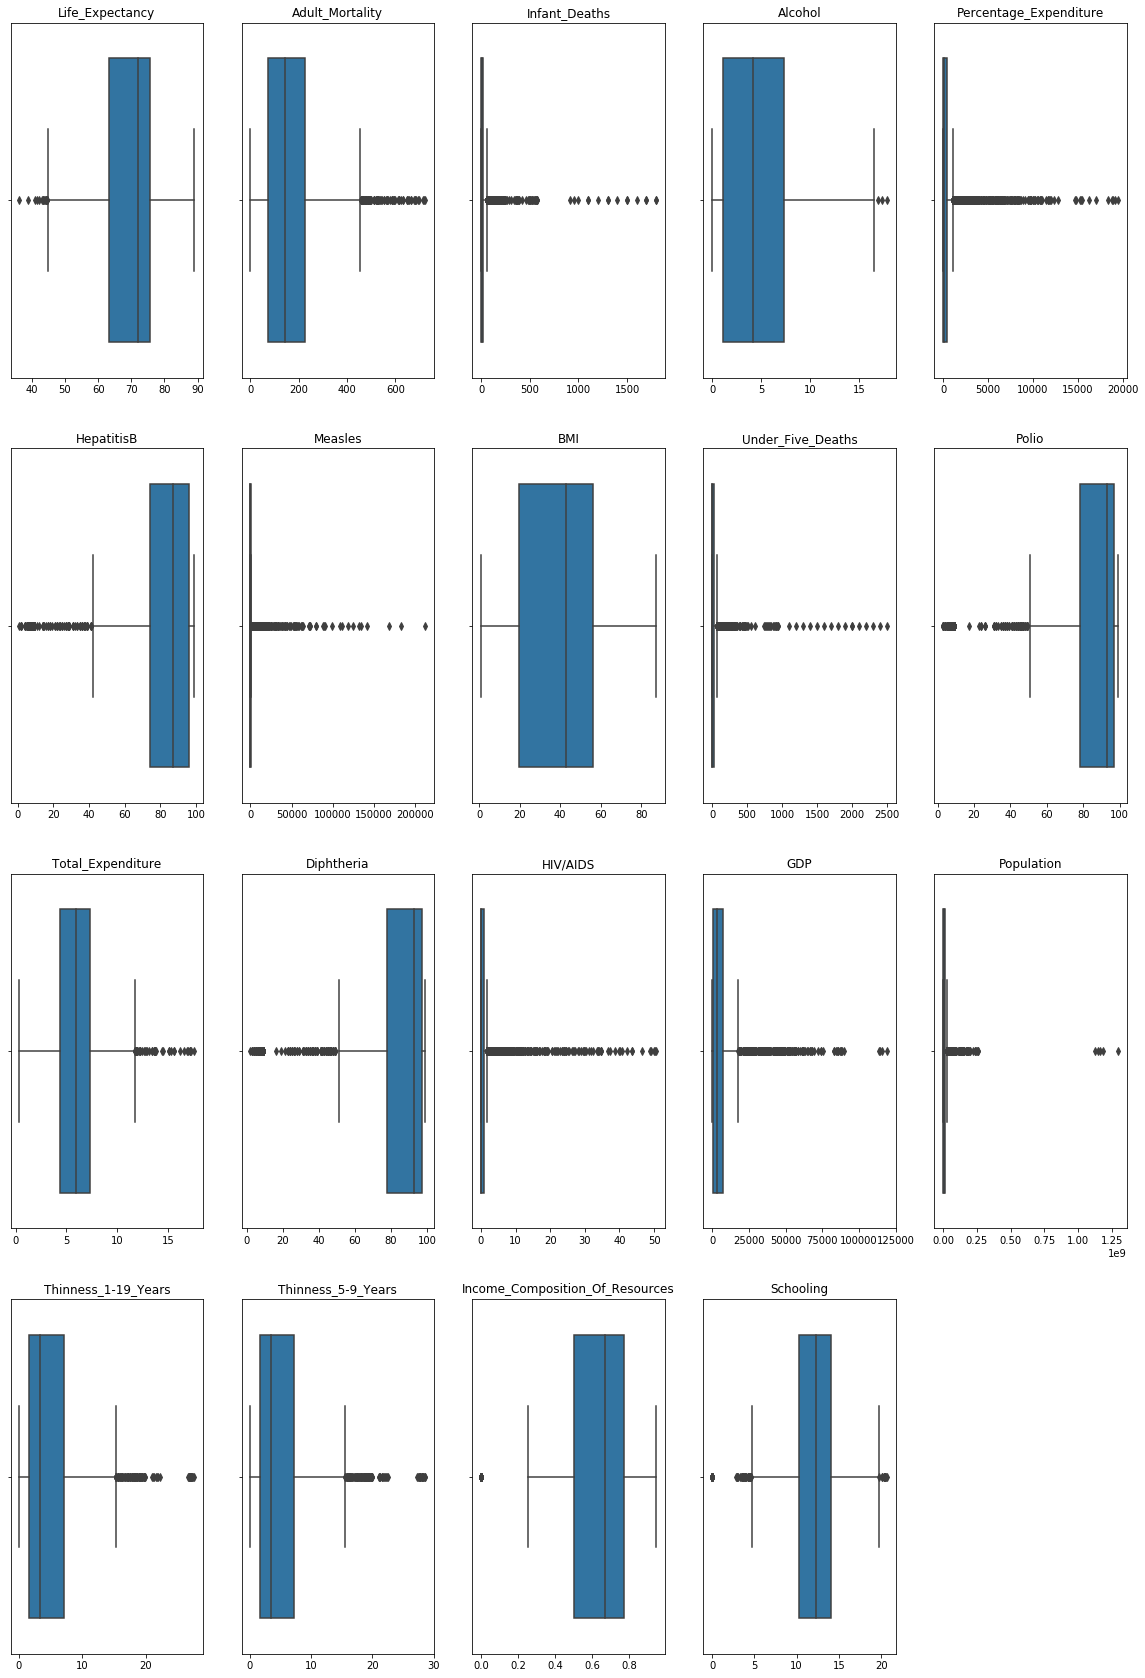

In [153]:
col_dict = {'Life_Expectancy':1,
            'Adult_Mortality':2,
            'Infant_Deaths':3,
            'Alcohol':4,
            'Percentage_Expenditure':5,
            'HepatitisB':6,
            'Measles':7,
            'BMI':8,
            'Under_Five_Deaths':9,
            'Polio':10,
            'Total_Expenditure':11,
            'Diphtheria':12,
            'HIV/AIDS':13,
            'GDP':14,
            'Population':15,
            'Thinness_1-19_Years':16,
            'Thinness_5-9_Years':17,
            'Income_Composition_Of_Resources':18,
            'Schooling':19}

plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df[col]).set(xlabel=None)
    plt.title(col)
plt.show()

In [154]:
# Count Outliers
def OutlierCounter(col):
    print(15*'-' + col + 15*'-')
    q25, q75 = np.nanquantile(df[col], [.25,.75])
    IQR = q75-q25
    minval = q25 - (1.5*IQR)
    maxval = q75 + (1.5*IQR)
    outlier_count = len(np.where((df[col] > maxval) | (df[col] < minval))[0])
    outlier_percent = round(outlier_count / len(df[col]*100),2)
    print("Outlier Counts: {}".format(outlier_count))
    print("Outlier Percentage: {}".format(outlier_percent))
    
cont_vars = df.columns[3:]

for cols in cont_vars:
    OutlierCounter(cols)


---------------Life_Expectancy---------------
Outlier Counts: 17
Outlier Percentage: 0.01
---------------Adult_Mortality---------------
Outlier Counts: 86
Outlier Percentage: 0.03
---------------Infant_Deaths---------------
Outlier Counts: 315
Outlier Percentage: 0.11
---------------Alcohol---------------
Outlier Counts: 3
Outlier Percentage: 0.0
---------------Percentage_Expenditure---------------
Outlier Counts: 389
Outlier Percentage: 0.13
---------------HepatitisB---------------
Outlier Counts: 222
Outlier Percentage: 0.08
---------------Measles---------------
Outlier Counts: 542
Outlier Percentage: 0.18
---------------BMI---------------
Outlier Counts: 0
Outlier Percentage: 0.0
---------------Under_Five_Deaths---------------
Outlier Counts: 394
Outlier Percentage: 0.13
---------------Polio---------------
Outlier Counts: 279
Outlier Percentage: 0.09
---------------Total_Expenditure---------------
Outlier Counts: 51
Outlier Percentage: 0.02
---------------Diphtheria---------------
O

### We will winsorizing to handle the outliers

In [155]:
#winsorize the data
df_clean = pd.DataFrame()
df_clean = df[["Country", "Year", "Status"]].copy()
df_clean[cont_vars[0]] = winsorize(df[cont_vars[0]], (0.01,0))  
df_clean[cont_vars[1]] = winsorize(df[cont_vars[1]], (0,0.03))  
df_clean[cont_vars[2]] = winsorize(df[cont_vars[2]], (0,0.11))  
df_clean[cont_vars[3]] = winsorize(df[cont_vars[3]], (0,0.01))  
df_clean[cont_vars[4]] = winsorize(df[cont_vars[4]], (0,0.14))  
df_clean[cont_vars[5]] = winsorize(df[cont_vars[5]], (0.08,0))  
df_clean[cont_vars[6]] = winsorize(df[cont_vars[6]], (0,0.19))  
df_clean[cont_vars[7]] = winsorize(df[cont_vars[7]], (0,0))  
df_clean[cont_vars[8]] = winsorize(df[cont_vars[8]], (0,0.14))  
df_clean[cont_vars[9]] = winsorize(df[cont_vars[9]], (0.1,0)) 
df_clean[cont_vars[10]] = winsorize(df[cont_vars[10]], (0.03,0))
df_clean[cont_vars[11]] = winsorize(df[cont_vars[11]], (0.11,0))
df_clean[cont_vars[12]] = winsorize(df[cont_vars[12]], (0,0.19))   
df_clean[cont_vars[13]] = winsorize(df[cont_vars[13]], (0,0.11))  
df_clean[cont_vars[14]] = winsorize(df[cont_vars[14]], (0,0.08))  
df_clean[cont_vars[15]] = winsorize(df[cont_vars[15]], (0,0.04))  
df_clean[cont_vars[16]] = winsorize(df[cont_vars[16]], (0,0.04))
df_clean[cont_vars[17]] = winsorize(df[cont_vars[17]], (0.05,0))
df_clean[cont_vars[18]] = winsorize(df[cont_vars[18]], (0.03,0.01))

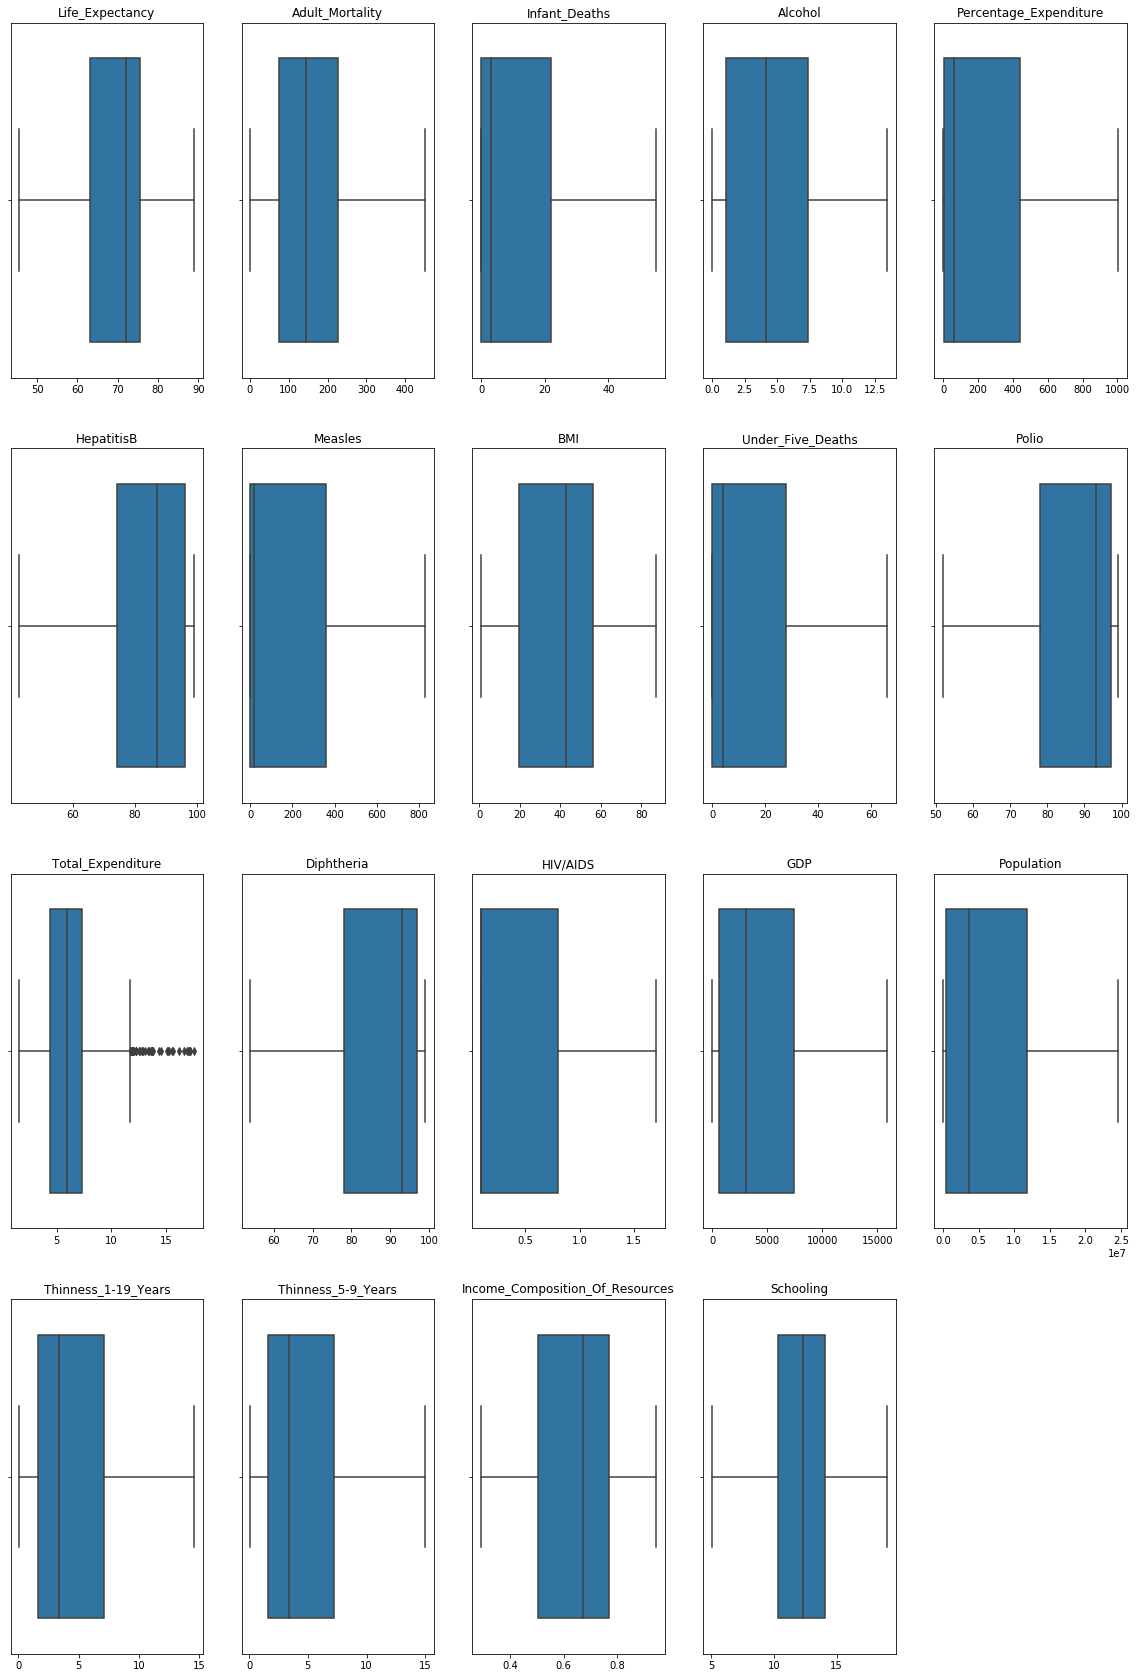

In [156]:
#plot the data after winsorized
plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df_clean[col]).set(xlabel=None)
    plt.title(col)
plt.show()

### We see that the winsorizing didn't have much effect on Total_Expenditure so we will run a log transformation on it

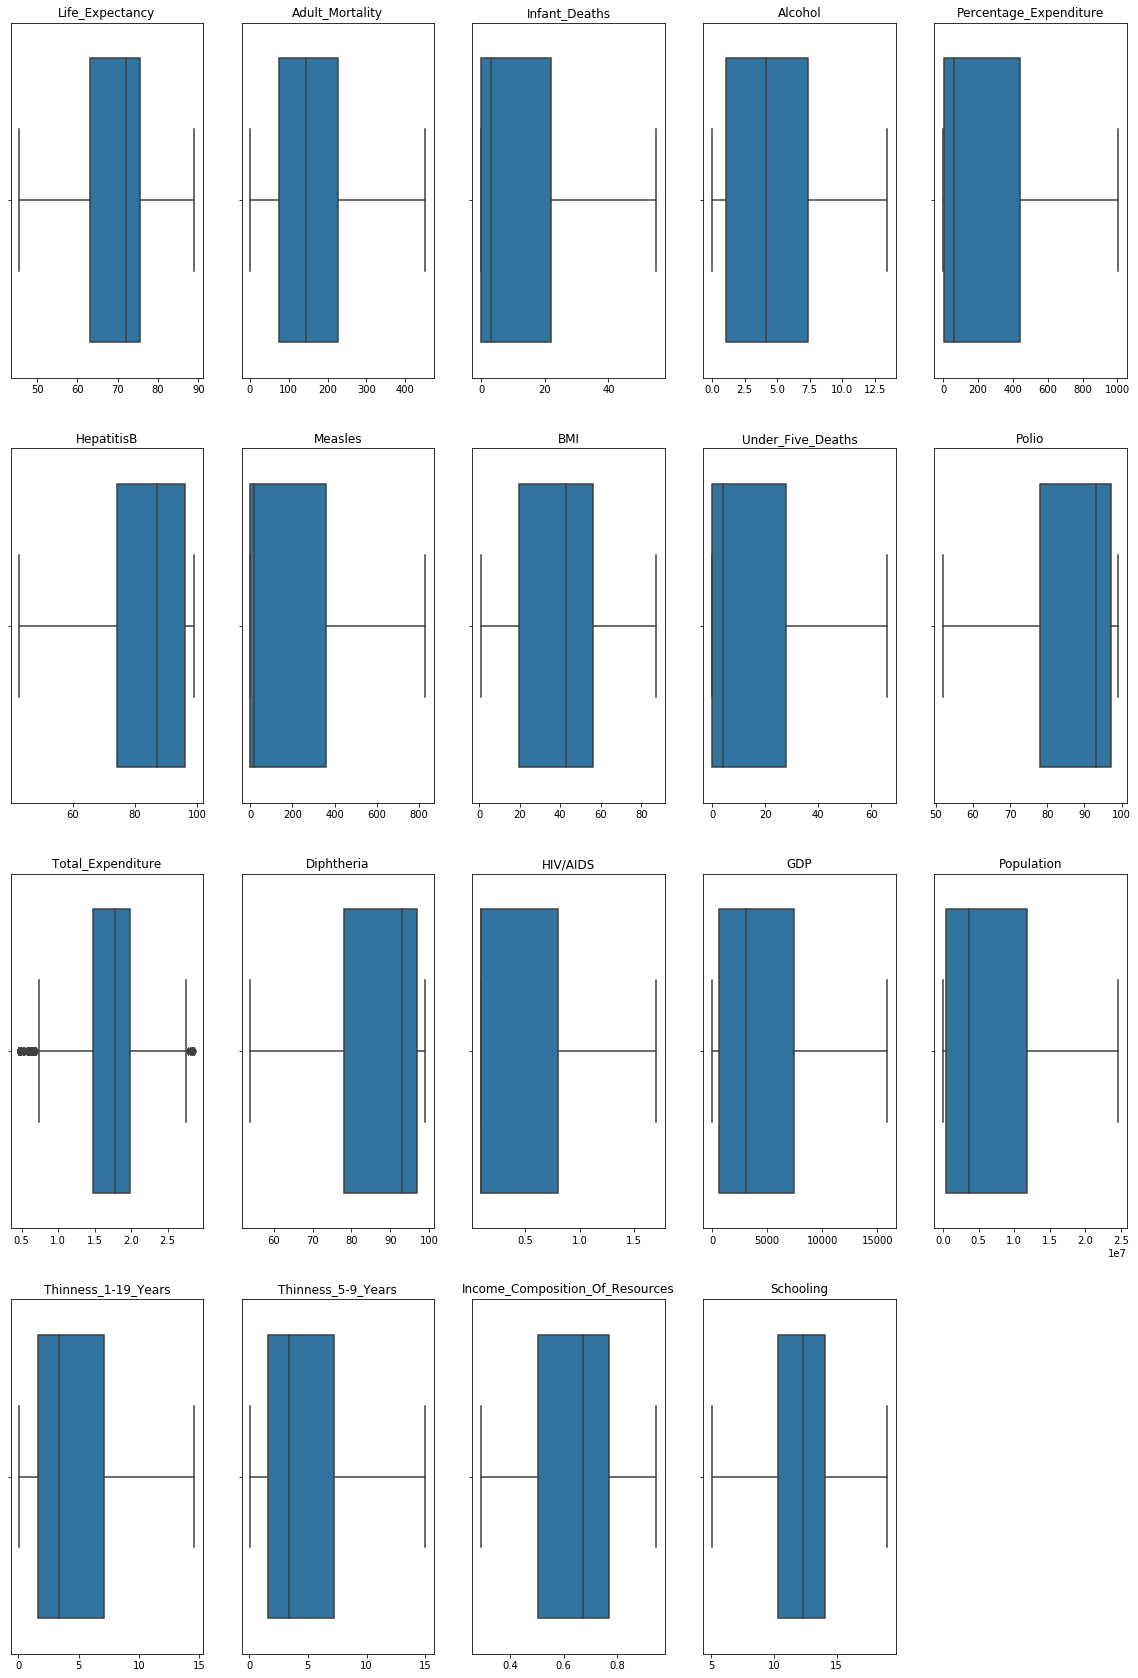

In [157]:
#Run log transformation on Total_Expenditure, Population and GDP
df_clean['Total_Expenditure'] = np.log(df_clean['Total_Expenditure'])
plt.figure(figsize=(20,30))
for col, i in col_dict.items():
    plt.subplot(4,5,i)
    sns.boxplot(df_clean[col]).set(xlabel=None)
    plt.title(col)
plt.show()

### The data seems to have improved a little bit

## EDA

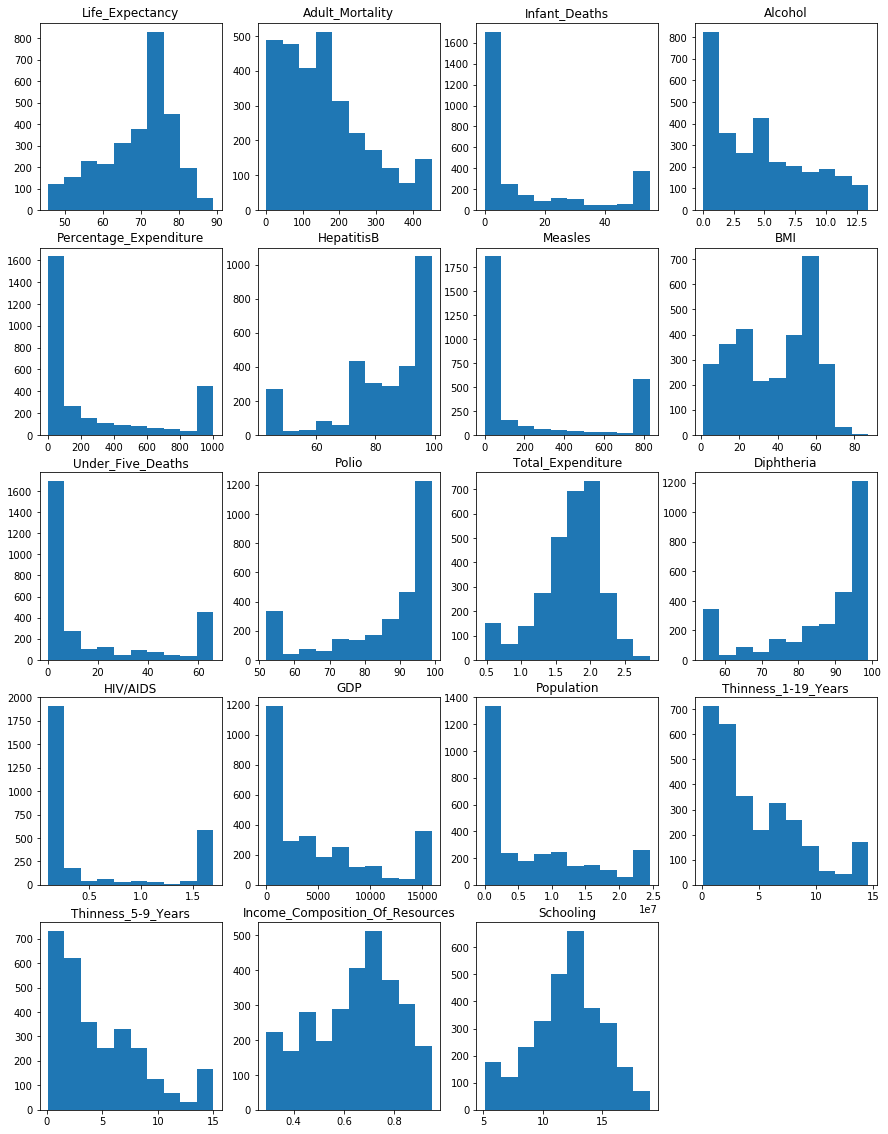

In [158]:
# Histogram
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(df_clean.iloc[:,3:][col])
    plt.title(col)


(array([ 12.,  14.,  19.,  66., 206., 149., 249., 612., 968., 643.]),
 array([0.        , 0.61136822, 1.22273644, 1.83410465, 2.44547287,
        3.05684109, 3.66820931, 4.27957753, 4.89094574, 5.50231396,
        6.11368218]),
 <a list of 10 Patch objects>)

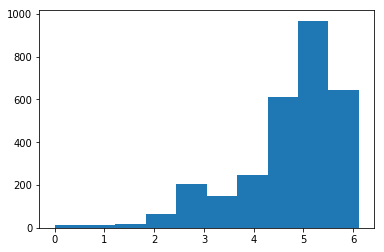

In [159]:
plt.hist(np.log(df_clean['Adult_Mortality']))

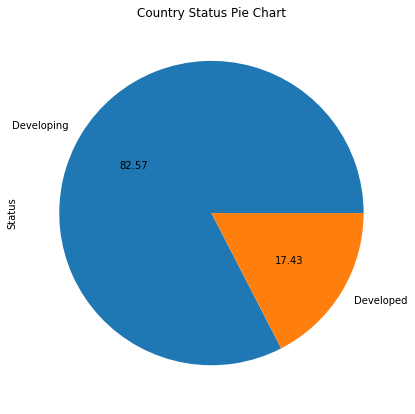

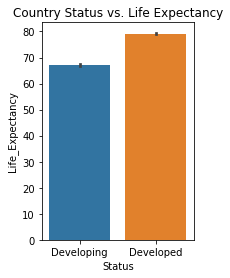

In [160]:
# Status
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
df_clean.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Country Status Pie Chart')
plt.show()
plt.subplot(1,2,2)
sns.barplot(x="Status", y="Life_Expectancy", data=df_clean)
plt.title("Country Status vs. Life Expectancy")
plt.show()

#### Most of the data is coming from developing countries and the life expectancy seems to be more in Developed countries. It does make sense as developed countries have better medical facilties to take care of citizen's health.

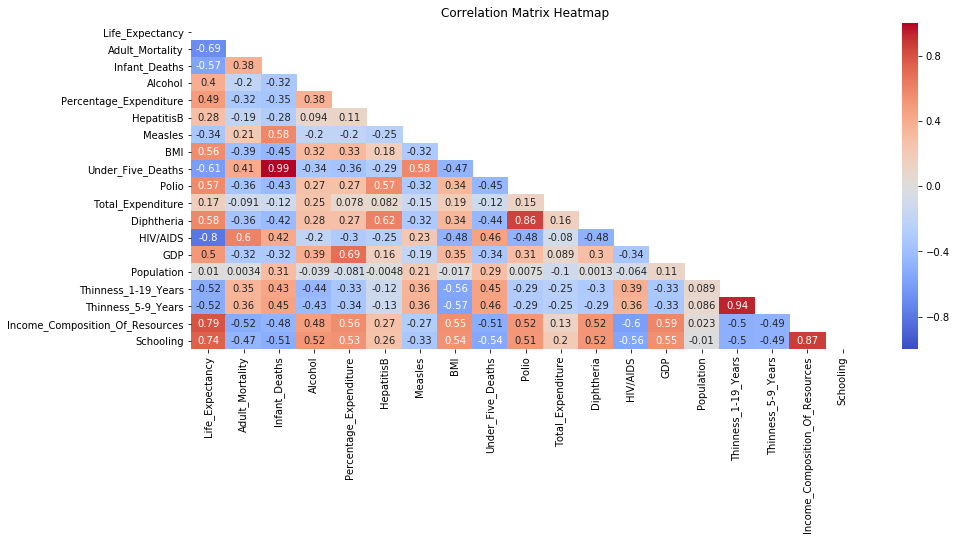

In [161]:
#Correlations
corrmat = df_clean.iloc[:,3:].corr()
mask = np.triu(df_clean.iloc[:,3:].corr())
plt.figure(figsize=(15,6))
sns.heatmap(corrmat, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Factors like Income_Composition_of_Resources, HIV/AIDS are highly correlated to the target variable (Life_Expectancy). Apart from that, we see some high correlations among the variables as well such as Diphtheria~Polio (0.88), GDP~Percentage_Expenditure (0.73), Schooling~Income_Composition_of_Resources (0.78) and Thinness_1-19_years~Thinness_5-9_years (0.97) which is pretty high.

In [164]:
df_clean.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

In [166]:
df_clean.drop(['Diphtheria', 'Percentage_Expenditure', 'Schooling', 'Thinness_5-9_Years'], axis=1, inplace=True)

In [167]:
df_clean

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,HIV/AIDS,GDP,Population,Thinness_1-19_Years,Income_Composition_Of_Resources
0,Afghanistan,2015,Developing,65.0,263.0,55,0.010000,65.000000,831,19.1,66,52.0,2.099244,0.1,584.259210,2.457751e+07,14.6,0.479
16,Albania,2015,Developing,77.8,74.0,0,4.600000,99.000000,0,58.0,0,99.0,1.791759,0.1,3954.227830,2.887300e+04,1.2,0.762
32,Algeria,2015,Developing,75.6,19.0,21,5.288333,95.000000,63,59.5,24,95.0,1.957274,0.1,4132.762920,2.457751e+07,6.0,0.743
48,Angola,2015,Developing,52.4,335.0,55,5.288333,64.000000,118,23.3,66,52.0,1.957274,1.7,3695.793748,2.785935e+06,8.3,0.531
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,5.288333,99.000000,0,47.7,0,86.0,1.957274,0.2,13566.954100,1.109741e+07,3.3,0.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,11,8.010000,43.000000,22,53.4,13,86.0,1.591274,0.1,4708.515191,9.440444e+06,1.8,0.670
2889,Viet Nam,2000,Developing,73.4,139.0,33,1.600000,74.035294,831,9.2,43,96.0,1.587192,0.1,4708.515191,9.440444e+06,14.6,0.569
2905,Yemen,2000,Developing,68.0,252.0,48,0.070000,43.000000,0,31.2,66,74.0,1.420696,0.1,4708.515191,9.440444e+06,14.1,0.436
2921,Zambia,2000,Developing,45.6,452.0,44,2.620000,74.035294,831,16.8,66,85.0,1.968510,1.7,341.955625,1.531221e+06,7.5,0.418


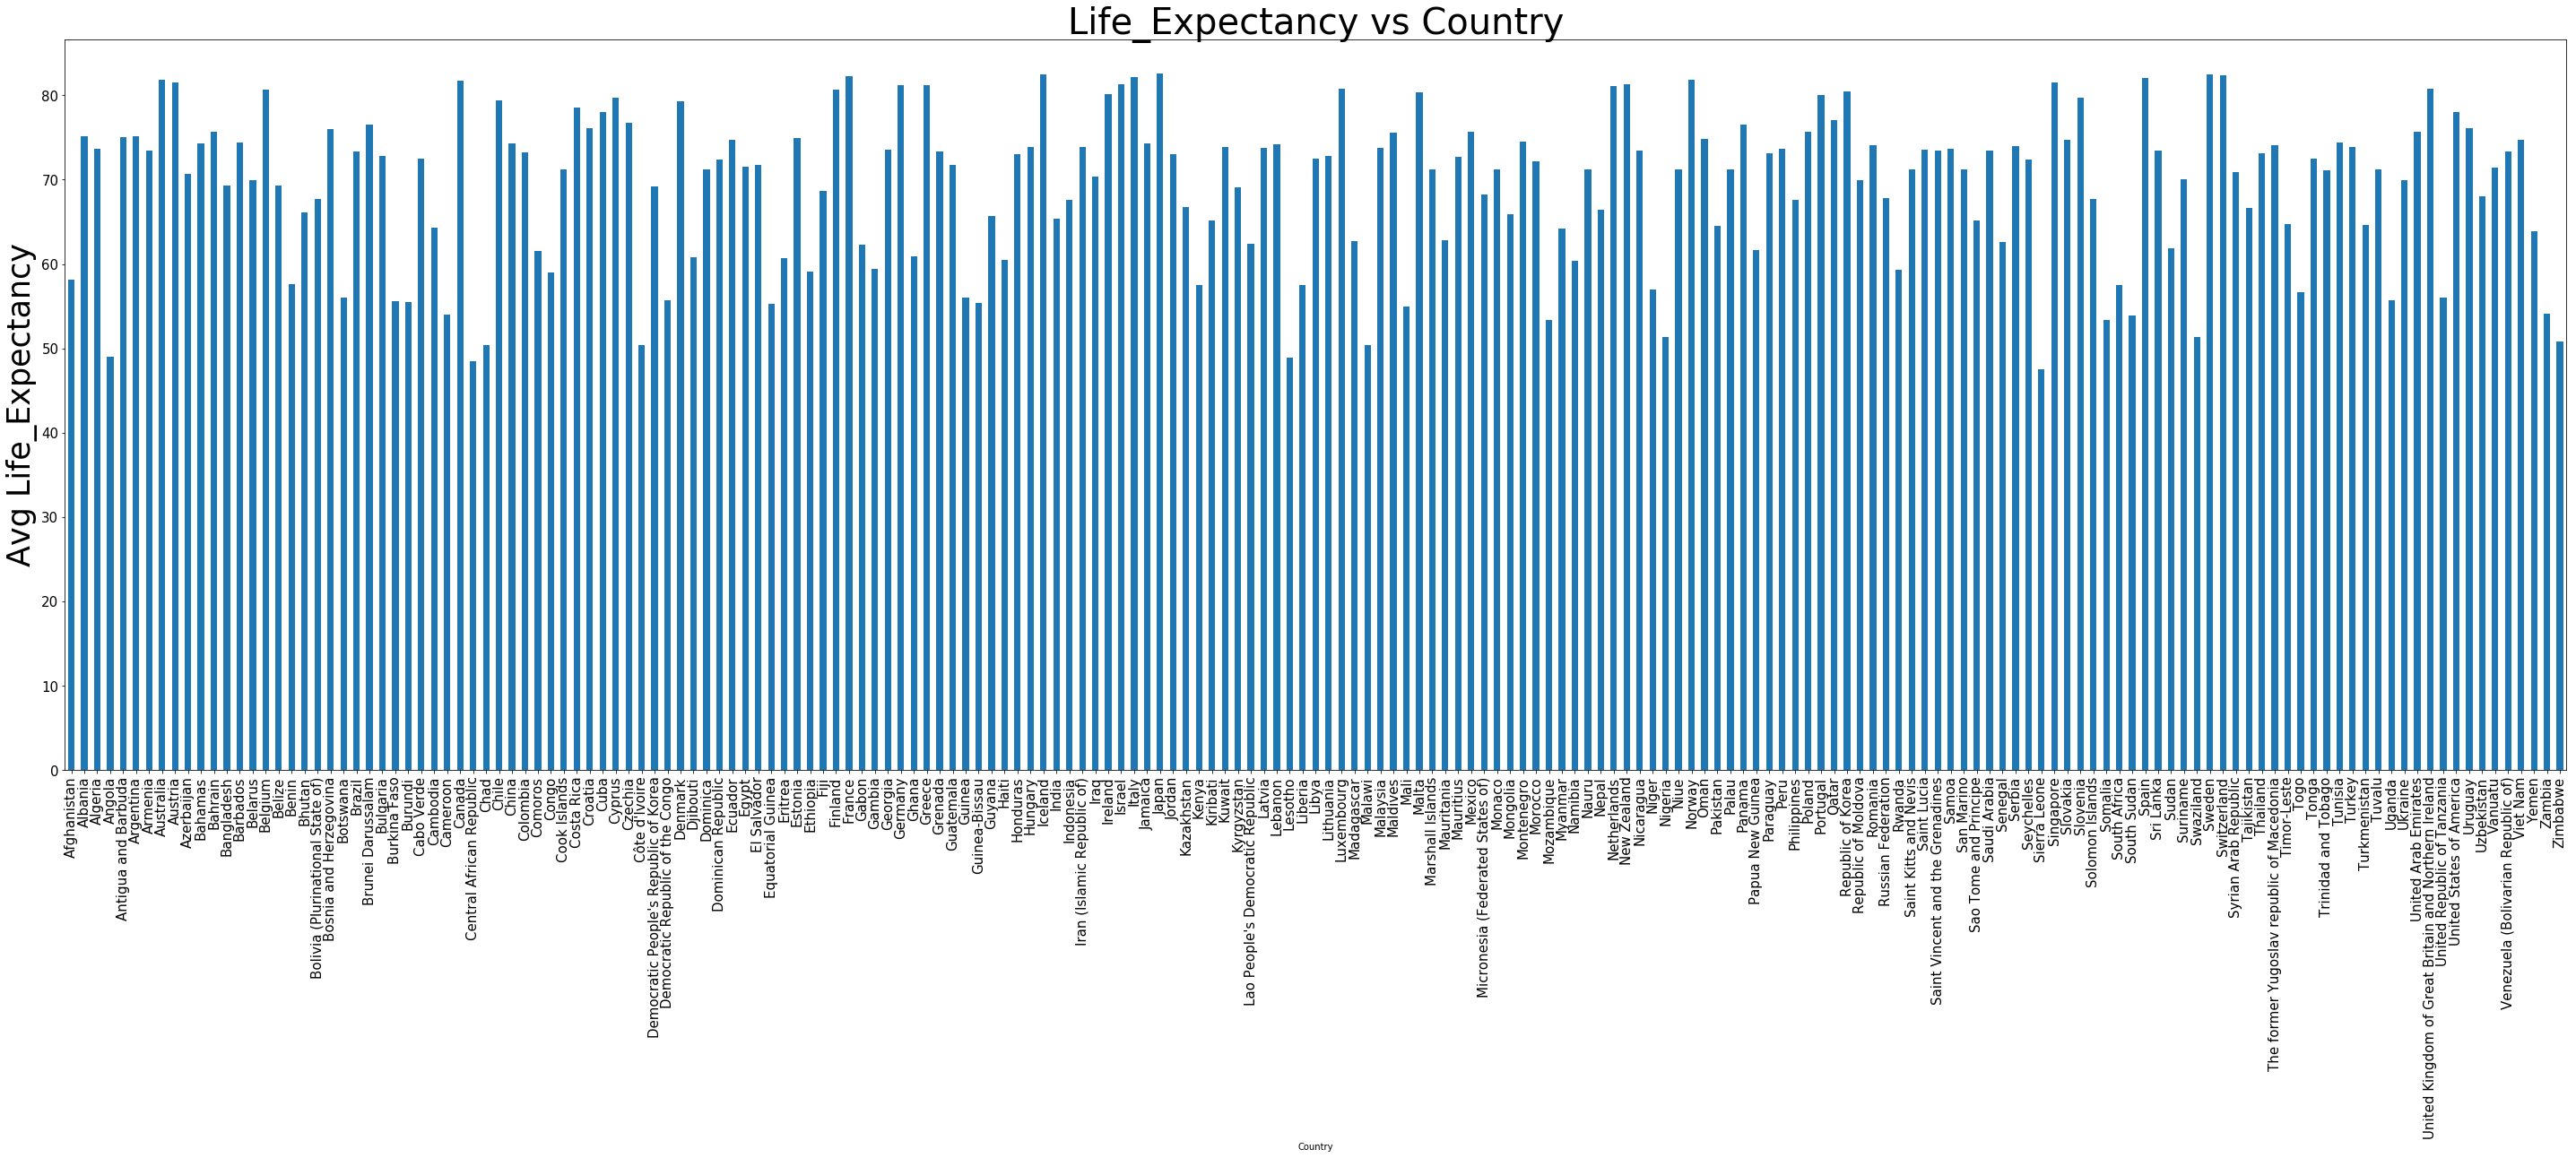

In [168]:
#Life Expectancy vs Country 
df_country = df_clean.groupby('Country')['Life_Expectancy'].mean()
df_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Life_Expectancy vs Country",fontsize=40)
plt.xlabel("Country")
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

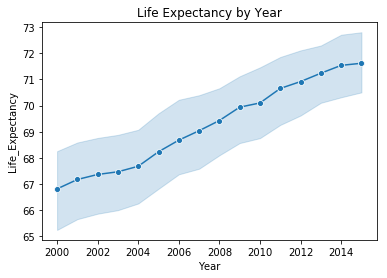

In [169]:
# Life_Expectancy vs Year
sns.lineplot('Year', 'Life_Expectancy', data=df_clean, marker='o')
plt.title('Life Expectancy by Year')
plt.show()


In [172]:
#TOP 10 Country with highest Life_Expectancy
top10 = df_clean.groupby("Country")["Life_Expectancy"].mean()
top10 = pd.DataFrame(index = df_clean["Country"].unique() , data = top10)
top10 = top10.sort_values(by= 'Life_Expectancy', ascending= False)
top10 = top10.head(10)
top10

,Life_Expectancy
Japan,82.53750
Sweden,82.51875
Iceland,82.44375
Switzerland,82.33125
France,82.21875
Italy,82.18750
Spain,82.06875
Australia,81.81250
Norway,81.79375
Canada,81.68750


## Modelling 

### Now we got an insight of the data doing EDA, we will start preparing the data for modelling.

#### We see that the data contains two variables (Country and Status) of 'object' datatype. So, we will create dummy variables for them.

In [173]:
country_dummies = pd.get_dummies(df_clean['Country'])
status_dummies = pd.get_dummies(df_clean['Status'])

In [174]:
df_clean.drop(['Country','Status'],inplace=True,axis=1)
df_clean = pd.concat([df_clean,country_dummies,status_dummies],axis=1)

In [175]:
df_clean

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,65.0,263.0,55,0.010000,65.000000,831,19.1,66,52.0,...,0,0,0,0,0,0,0,0,0,1
16,2015,77.8,74.0,0,4.600000,99.000000,0,58.0,0,99.0,...,0,0,0,0,0,0,0,0,0,1
32,2015,75.6,19.0,21,5.288333,95.000000,63,59.5,24,95.0,...,0,0,0,0,0,0,0,0,0,1
48,2015,52.4,335.0,55,5.288333,64.000000,118,23.3,66,52.0,...,0,0,0,0,0,0,0,0,0,1
64,2015,76.4,13.0,0,5.288333,99.000000,0,47.7,0,86.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,2000,72.5,168.0,11,8.010000,43.000000,22,53.4,13,86.0,...,0,0,0,1,0,0,0,0,0,1
2889,2000,73.4,139.0,33,1.600000,74.035294,831,9.2,43,96.0,...,0,0,0,0,1,0,0,0,0,1
2905,2000,68.0,252.0,48,0.070000,43.000000,0,31.2,66,74.0,...,0,0,0,0,0,1,0,0,0,1
2921,2000,45.6,452.0,44,2.620000,74.035294,831,16.8,66,85.0,...,0,0,0,0,0,0,1,0,0,1


In [176]:
# storing the cleaned data for further use
df_clean.to_csv('cleaned_data.csv')

### Train-test split

In [177]:
# split X, y
X = df_clean.drop('Life_Expectancy', axis=1)
y = df_clean['Life_Expectancy']

In [178]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60616)

#### The standard least squares coefficient estimates are scale equivariant, therefore, we didn't need to do scaling.

### Multiple Linear Regression 

In [179]:
X_train_1 = sm.add_constant(X_train, has_constant='add')
model = sm.OLS(y_train, X_train_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     238.4
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:17:41   Log-Likelihood:                -4150.0
No. Observations:                2056   AIC:                             8706.
Df Residuals:                    1853   BIC:                             9849.
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### We see that the p-values are less for pretty much all the predictors except a few. But we cannot just go with p-values to check significance of predictors. We will go with the scores.

In [180]:
X_test_1 = sm.add_constant(X_test, has_constant='add')
pred = model.predict(X_test_1)

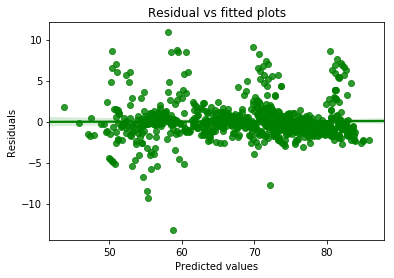

In [181]:
residuals = y_test - pred
ax = sns.regplot(pred, residuals, color='g')
ax.set(xlabel='Predicted values', ylabel='Residuals', title='Residual vs fitted plots')
plt.show()

#### Based on the residual plots, we can imply that other a few outliers, the model generated is good enough as the points are getting clustered towards the center. But we need to calculate some metrics in order to check that.

#### Let's calculate evaluation metrics for training data

In [182]:
score_train = []
pred_train = model.predict(X_train_1)
rmse_train = mean_squared_error(y_train, pred_train)**(0.5)
print("Root mean square for train data: ", rmse_train)
print('r_square: ',model.rsquared)
print("Adjusted R_square: ", model.rsquared_adj)
score_train.append({"Model": "Multiple Linear Regression", "R_square": model.rsquared, "Root Mean_square": rmse,
               "Adjusted R_square": model.rsquared_adj})

Root mean square for train data:  1.8212654322103934
r_square:  0.9629487218948382
Adjusted R_square:  0.9589096726896343


#### Now let's calculate it for test data

In [183]:
score_test = []
rmse = mean_squared_error(y_test, pred)**(0.5)
print('Root mean squared error: ', rmse)
r_2 = r2_score(y_test, pred)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test.columns)-1)))
print("Adjusted R_square: ", adj_r2)
score_test.append({"Model": "Multiple Linear Regression", "R_square": r_2, "Root Mean_square": rmse,
               "Adjusted R_square": adj_r2})

Root mean squared error:  2.167021862229942
r_square:  0.9474750657851506
Adjusted R_square:  0.9475346178647592


#### We see a big difference in root mean square value for both test and train data. There might be a chance of overfitting since we are considering all the variables. Therefore, we will try shrinking methods like lasso and ridge and see if we can reduce that.

### But before that, we will do some feature scaling

In [184]:
'''
The ridge and lasso regression coefficient estimates can change substantially 
when multiplying a given predictor by a constant. That's why it is important 
that we do scaling before we do regression.
'''
# Standardizing the features based on unit variance
X_scaled = StandardScaler().fit_transform(X)

### Ridge Regression

In [185]:
# lambda values for both ridge and losso regression will be taken in this range.
n_alphas = 100
alphas = np.logspace(-7, 0.5, n_alphas)

In [186]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.02009233002565046

#### We see that the best alpha value coming out of cross validation is 0.016876124757881486. Now we will put that into our model.

In [187]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=60616)

In [188]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
pred_train = ridge.predict(X_train)
pred_test = ridge.predict(X_test)

#### Calculating scores for train data

In [189]:
rmse = mean_squared_error(y_train, pred_train)**(0.5)
print('Root mean squared error: ', rmse)
r_2 = r2_score(y_train, pred_train)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_train)-1)/(len(X_train-len(X_train[0])-1)))
print("Adjusted R_square: ", adj_r2)
score_train.append({"Model": "Ridge Regression", "R_square": r_2, "Root Mean_square": rmse,
               "Adjusted R_square": adj_r2})

Root mean squared error:  1.821266374391482
r_square:  0.9629486835599288
Adjusted R_square:  0.9629667046282362


#### Calculating scores for test data

In [190]:
rmse = mean_squared_error(y_test, pred_test)**(0.5)
print('Root mean squared error: ', rmse)
r_2 = r2_score(y_test, pred_test)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test[0])-1)))
print("Adjusted R_square: ", adj_r2)
score_test.append({"Model": "Ridge Regression", "R_square": r_2, "Root Mean_square": rmse,
               "Adjusted R_square": adj_r2})

Root mean squared error:  2.1642572487747835
r_square:  0.9476089993782094
Adjusted R_square:  0.9476683996056717


#### We can still see a case of overfitting. Let's see if lasso can reduce that.

## Lasso Regression

In [191]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

5.3366992312063123e-05

#### We see that the best alpha value coming out of cross validation is 5.3366992312063123e-05. Now we will put that into our model.

In [192]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)

#### Calculating scores for train data

In [193]:
rmse = mean_squared_error(y_train, pred_train)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_train, pred_train)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_train)-1)/(len(X_train-len(X_train[0])-1)))
print("Adjusted R_square: ", adj_r2)
score_train.append({"Model": "Lasso Regression", "R_square": r_2, "Root Mean_square": rmse,
               "Adjusted R_square": adj_r2})

Root mean squared error:  1.821604236765201
r_square:  0.9629349355359987
Adjusted R_square:  0.9629529632910883


#### Calculating scores for test data

In [194]:
rmse = mean_squared_error(y_test, pred_test)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_test, pred_test)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test-1)/(len(X_test-len(X_test[0])-1))))
print("Adjusted R_square: ", adj_r2)
score_test.append({"Model": "Lasso Regression", "R_square": r_2, "Root Mean_square": rmse,
               "Adjusted R_square": adj_r2})

Root mean squared error:  2.169371407240182
r_square:  0.9473611060680361
Adjusted R_square:  0.9473611060680361


#### We see that shrinking methods are not that effective. So we will try some other models.

## Decision Tree

In [195]:
'''
Decision and Random Forest is a tree-based model and hence does not require feature scaling.
'''

# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60616)

In [196]:
parameters = {'min_samples_split':(5, 10, 15, 20, 25, 30, 35), 'min_samples_leaf':(2, 6, 10, 14, 18, 22, 26, 30),
             'max_features': ('auto', 'sqrt', 'log2')}
dtr = DecisionTreeRegressor()
d_reg = GridSearchCV(dtr, parameters)
d_reg.fit(X_train , y_train)
dtr_predict_train = d_reg.predict(X_train)
dtr_predict_test = d_reg.predict(X_test)

#### Calculating scores for train data

In [197]:
rmse = mean_squared_error(y_train, dtr_predict_train)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_train, dtr_predict_train)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_train)-1)/(len(X_train-len(X_train.columns)-1)))
print("Adjusted R_square: ", adj_r2)
score_train.append({"Model": "Decision Tree", "R_square": r_2, "Root Mean_square": rmse, "Adjusted R_square": adj_r2})

Root mean squared error:  1.0507165201727582
r_square:  0.9876681615816602
Adjusted R_square:  0.9876741595575446


#### Calculating scores for test data

In [198]:
rmse = mean_squared_error(y_test, dtr_predict_test)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_test, dtr_predict_test)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test.columns)-1)))
print("Adjusted R_square: ", adj_r2)
score_test.append({"Model": "Decision Tree", "R_square": r_2, "Root Mean_square": rmse, "Adjusted R_square": adj_r2})

Root mean squared error:  2.4865525903060157
r_square:  0.9308433051047331
Adjusted R_square:  0.9309217140558615


#### Turns out massive overfitting is happening. Let's see how random forest performs.

## Random Forest  

In [199]:
parameters = {'n_estimators': (20, 40, 60, 80 , 100), 'min_samples_split':(5, 10, 15, 20, 25, 30, 35), 'min_samples_leaf':(2, 6, 10, 14, 18, 22, 26, 30),
             'max_features': ('auto', 'sqrt', 'log2')}
rfr = RandomForestRegressor()
rf_reg = GridSearchCV(rfr, parameters)
rf_reg.fit(X_train , y_train)
rfr_predict_train = rf_reg.predict(X_train)
rfr_predict_test = rf_reg.predict(X_test)

#### Calculating scores for train data

In [200]:
rmse = mean_squared_error(y_train, rfr_predict_train)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_train, rfr_predict_train)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_train)-1)/(len(X_train-len(X_train.columns)-1)))
print("Adjusted R_square: ", adj_r2)
score_train.append({"Model": "Random Forest", "R_square": r_2, "Root Mean_square": rmse, "Adjusted R_square": adj_r2})

Root mean squared error:  0.9136291993302634
r_square:  0.9906761206217892
Adjusted R_square:  0.9906806555825763


#### Calculating scores for test data

In [201]:
rmse = mean_squared_error(y_test, rfr_predict_test)**(0.5)
print('Root mean squared error: ',rmse )
r_2 = r2_score(y_test, rfr_predict_test)
print('r_square: ',r_2)
adj_r2 = 1-(1-r_2)*((len(X_test)-1)/(len(X_test-len(X_test.columns)-1)))
print("Adjusted R_square: ", adj_r2)
score_test.append({"Model": "Random Forest", "R_square": r_2, "Root Mean_square": rmse, "Adjusted R_square": adj_r2})

Root mean squared error:  1.9530788262411902
r_square:  0.9573343393161561
Adjusted R_square:  0.9573827130811038


#### Although theperformance has improved very well compared to the previous ones, there is signs of overfitting. But we will go with this model.

In [202]:
Result_train_df = pd.DataFrame(score_train)
Result_test_df = pd.DataFrame(score_test)

#### Train data results 

In [203]:
Result_train_df 

,Model,R_square,Root Mean_square,Adjusted R_square
0,Multiple Linear Regression,0.962949,1.972153,0.958910
1,Ridge Regression,0.962949,1.821266,0.962967
2,Lasso Regression,0.962935,1.821604,0.962953
3,Decision Tree,0.987668,1.050717,0.987674
4,Random Forest,0.990676,0.913629,0.990681


#### Test data results

In [204]:
Result_test_df 

,Model,R_square,Root Mean_square,Adjusted R_square
0,Multiple Linear Regression,0.947475,2.167022,0.947535
1,Ridge Regression,0.947609,2.164257,0.947668
2,Lasso Regression,0.947361,2.169371,0.947361
3,Decision Tree,0.930843,2.486553,0.930922
4,Random Forest,0.957334,1.953079,0.957383


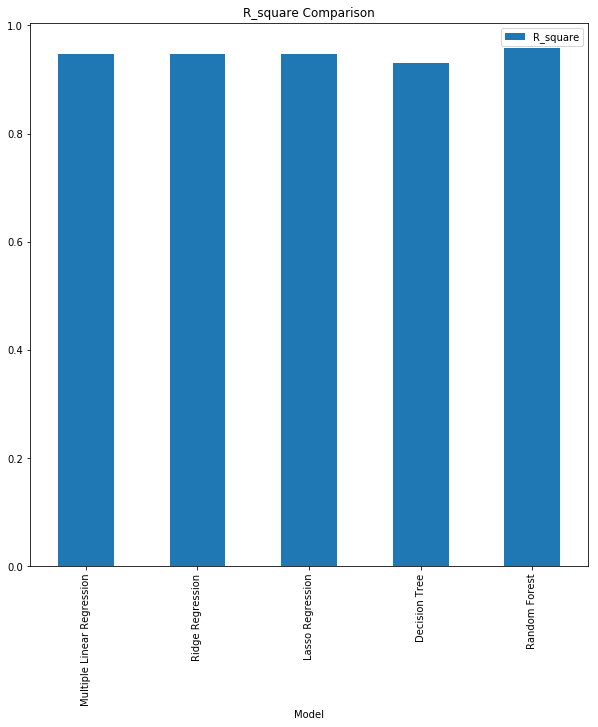

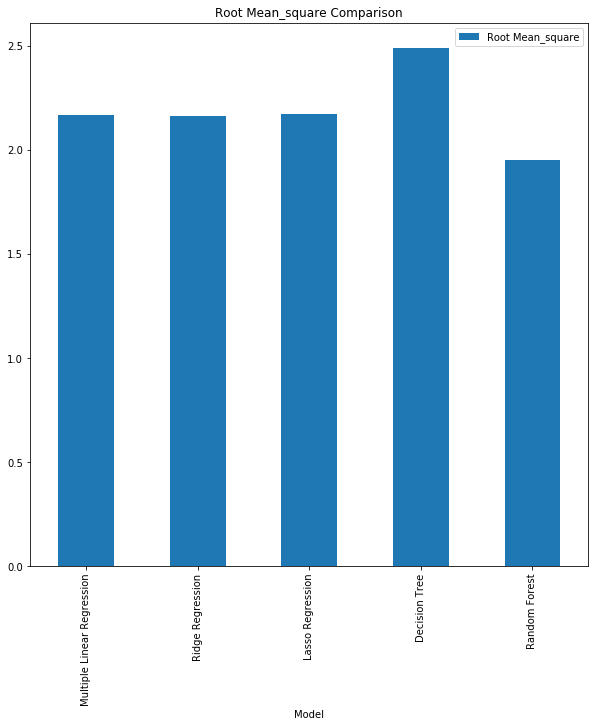

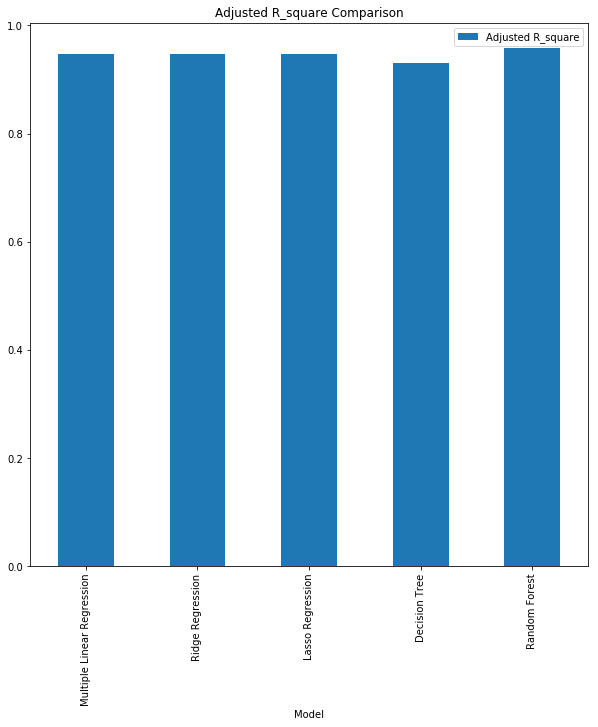

In [205]:
metrics = ['R_square', 'Root Mean_square', 'Adjusted R_square']
for i in metrics:
    Result_test_df .plot(x='Model', y=i, kind='bar', figsize=(10,10), title=i+' Comparison')

### From the plots, we cannot see much difference in the metric scores since all of them perform near about same, but we can check from the table. Decision Tree which is performing the worst of all, escpecially based on RMSE.


### Random Forest came out to be the best model. Shrinkage methods like Lasso and ridge couldn't improve performance of MLR. In fact, it got reduced.